<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 2 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Martin Salinas Scussolin; 201773557-0 ; Malla Nueva </h4>
    <h4> Jose Quezada Silva ; 201773528-7 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Marzo 2019</h4></center>
</p>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 3 de Mayo.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**


---
**Esto es solo una sugerencia y no tendrá ningún impacto en su nota**

## Tip para Gráficos (Python)

Puede hacer sus gráficos un poco más estilosos utilizando la libreria seaborn

```python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline #con esto no es necesario hacer plt.show()
```

El uso es igual que un gráfico de matplotlib, solo que ```sns.set()``` hace que se cargue la visualización de seaborn encima. [Informacion sobre seaborn.set()](https://seaborn.pydata.org/generated/seaborn.set.html)

## Tip para Gráficos (R)

Puede hacer sus gráficos un poco más estilosos utilizando la libreria [ggplot2](https://www.statmethods.net/advgraphs/ggplot2.html)


## Interactive Widgets

Si usted está trabajando en python puede hacer una widget interactiva que varíe los parámetros de una función, como se puede ver en el siguiente fragmento de código (debe ejecutarlo).

In [1]:
from ipywidgets import interact 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline 



---
## 1. Retención de Clientes

La fuga (*churn*, término en inglés) de clientes es algo que muchas empresas de hoy en día sufren, la fuga puede deberse a muchos factores, uno de estos podría ser alguna característica del servicio en sí que provee la empresa. En esta sección usted trabajará con un dataset de "Telco", una empresa de telecomunicaciones, donde verá varios datos relacionados al plan de los clientes, uno de estos campos siendo "*Churn*", si el cliente se fugó o no. 

El archivo a utilizar es "churn.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/blastchar/telco-customer-churn)

>a) Haga un análisis exploratorio **a su criterio** del dataset y extraiga 3 conclusiones acerca del conjunto de datos

### Desarrollo

In [3]:
import pandas as pd
import scipy as sc

In [4]:
#inclusion dataset
df = pd.read_csv("churn.csv") 

Después de cargar los datos, se separan por género, para luego ser filtrados por la columna tenure, la cual muestra la duración de los clientes en la compañía. Esto se realiza con el fin de poder graficar los datos y tener una mejor apreciación de estos.

In [30]:
dfFemale = df.loc[(df["gender"] == 'Female')]
dfMale = df.loc[(df["gender"] == 'Male')]

dfToPlotMale = pd.DataFrame(dfMale.groupby("tenure").size())
dfToPlotMale.columns=["Men"]

dfToPlotFemale = pd.DataFrame(dfFemale.groupby("tenure").size())
dfToPlotFemale.columns=["Women"]

dfToPlot = pd.concat([dfToPlotMale,
                      dfToPlotFemale],
                      sort=False,
                      axis=1)

In [33]:
dfToPlot.describe()[1:]

,Men,Women
mean,48.698630,47.780822
std,40.917154,37.016981
min,6.000000,5.000000
25%,33.000000,32.000000
50%,38.000000,38.000000
75%,50.000000,48.000000
max,329.000000,284.000000


Se usa el método describe de pandas para obtener un análisis básico de los datos separados anteriormente. 
Se puede ver que los datos son similares entre hombres y mujeres, estos se asemejan tanto como en los cuartiles, donde la diferencia es de un mes. Además, se puede ver que el mayor tiempo que duró un cliente hombre es mayor a la máxima estadía de un cliente mujer. En relación a la desviación estándar de los datos, se puede notar que la de los hombres es mayor.
Lo anterior se puede ver reflejado en los boxplots siguientes, en los cuales se omiten los outliers para una mejor visualización de los datos.

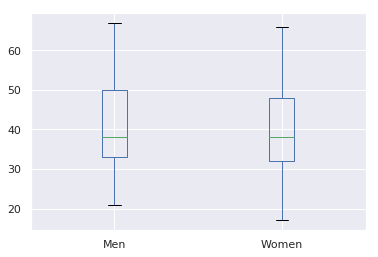

In [34]:
dfToPlot.boxplot(showfliers=False)

Se puede ver que los datos son similares entre sí, con la pequeña diferencia, que en el caso de los hombres, los datos son un poco más grandes que los de las mujeres.

> b.1) Determine la probabilidad de que: <ul>
    <li>Un cliente sea mujer dado que tiene fibra óptica </li>
    <li>Un cliente sea hombre dado que tiene fibra óptica</li>
    <li>Un cliente sea mujer dado que no tiene fibra óptica</li>
    <li>Un cliente sea hombre dado que no tiene fibra óptica</li>
    </ul>
    Además indique cuál/es de estos pares deben sumar 1 (Si es que algún par debe sumar esta cantidad). Justifique su respuesta.
    

### Desarrollo
Para el cálculo de las probabilidades, se utiliza probabilidad condicional, para ello, se separan los datos según los requisitos necesarios. 


In [39]:
def p_A_if_B(a,b):
    return a/b

def Bayes(a,b,c):
    return (a*b/c)

In [40]:
class probs:

    opticFiber = len(df.loc[df["InternetService"] == "Fiber optic"])/len(df)
    notOpticFiber = len(df.loc[df["InternetService"] != "Fiber optic"])/len(df)
    
    women = len(df.loc[(df["gender"] == "Female")])/len(df)
    womenOF = len(df.loc[(df["gender"] == "Female") & (df["InternetService"] == "Fiber optic")])/len(df)
    womenNotOf = len(df.loc[(df["gender"] == "Female") & (df["InternetService"] != "Fiber optic")])/len(df)
   
    men = len(df.loc[(df["gender"] == "Male")])/len(df)
    menOF = len(df.loc[(df["gender"] == "Male") & (df["InternetService"] == "Fiber optic")])/len(df)
    menNotOf = len(df.loc[(df["gender"] == "Male") & (df["InternetService"] != "Fiber optic")])/len(df)
    
#round(probabilities.women,2)
print("Probabilidad de que un cliente sea mujer dado que tiene fibra óptica:", 
      p_A_if_B(probs.womenOF, probs.opticFiber))
print("Probabilidad de que un cliente sea hombre dado que tiene fibra óptica:" ,
      p_A_if_B(probs.menOF, probs.opticFiber))
print("Probabilidad de que un cliente sea mujer dado que no tiene fibra óptica:",
      p_A_if_B(probs.womenNotOf, probs.notOpticFiber))
print("Probabilidad de que un cliente sea hombre dado que no tiene fibra óptica:", 
      p_A_if_B(probs.menNotOf, probs.notOpticFiber))

Probabilidad de que un cliente sea mujer dado que tiene fibra óptica: 0.5016149870801033
Probabilidad de que un cliente sea hombre dado que tiene fibra óptica: 0.4983850129198967
Probabilidad de que un cliente sea mujer dado que no tiene fibra óptica: 0.49024575627058525
Probabilidad de que un cliente sea hombre dado que no tiene fibra óptica: 0.5097542437294148


>b.2) ¿Es posible concluir que si un cliente es hombre tiene más probabilidad de tener fibra óptica? ¿Y si es mujer? ¿Por qué?

### Desarrollo
Usando la regla de Bayes, y con los datos separados anteriormente, se pueden obtener las probabilidades solicitadas.

In [41]:
print("Probabilidad de que tenga fibra óptica dado que es hombre:",
      Bayes(p_A_if_B(probs.menOF, probs.opticFiber),probs.opticFiber,probs.men))
print("Probabilidad de que tenga fibra óptica dado que es mujer:",
      Bayes(p_A_if_B(probs.womenOF, probs.opticFiber),probs.opticFiber,probs.women))

Probabilidad de que tenga fibra óptica dado que es hombre: 0.4340365682137834
Probabilidad de que tenga fibra óptica dado que es mujer: 0.4452408256880734


Con los valores encontrados anteriormente, es posible concluir de que la probabilidad de que una cliente tenga fibra óptica dado que es mujer es mayor.

>c) Utilizando criterios de probabilidad condicional ¿Hay algún servicio de internet más propenso a la fuga?

### Desarrollo
Usando probabilidad condicional es posible obtener los datos. Además, se separa el dataset según es necesario.

In [44]:
class probs2:
    
    IntChurn = len(df.loc[(df["Churn"] == "Yes") & (df["InternetService"] != "No") ])
    IntDSL = len(df.loc[(df["InternetService"] == "DSL")])
    IntDSLChurn = len(df.loc[(df["InternetService"] == "DSL") & (df["Churn"] == "Yes")])
    
    IntOf = len(df.loc[(df["InternetService"] == "Fiber optic")])
    IntOfChurn = len(df.loc[(df["InternetService"] == "Fiber optic") & (df["Churn"] == "Yes")])

print("Probabilidad de que un cliente tenga DSL dado que se fugó:",
      p_A_if_B(probs2.IntDSLChurn,probs2.IntDSL))
print("Probabilidad de que un cliente tenga fibra óptica dado que se fugó:",
      p_A_if_B(probs2.IntOfChurn,probs2.IntOf))

Probabilidad de que un cliente tenga DSL dado que se fugó: 0.1895910780669145
Probabilidad de que un cliente tenga fibra óptica dado que se fugó: 0.4189276485788114


Con esto, es posible concluir que si un cliente tiene fibra óptica como servicio de internet, entonces es más propenso a salirse de la compañía.

>d) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la fuga? y ¿es la fuga un buen predictor del cargo mensual de un cliente?

### Desarrollo 
Se obtienen rangos de cargo mensual, a partir de los datos mín y máx del dataset en la columna MonthlyCharges. Esto se realiza con el fin de encontrar que el intervalo más grande posee más personas las cuales se retiran de la compañía.

In [46]:
print("Máximo:", df["MonthlyCharges"].max())
print("Mínimo:", df["MonthlyCharges"].min())
df["MonthlyCharges"].groupby(pd.cut(df["MonthlyCharges"],bins=np.arange(18.25,118.75,20))).sum()

Máximo: 118.75
Mínimo: 18.25


MonthlyCharges
(18.25, 38.25]      40416.35
(38.25, 58.25]      49396.00
(58.25, 78.25]      93648.70
(78.25, 98.25]     159553.15
(98.25, 118.25]    112491.20
Name: MonthlyCharges, dtype: float64

In [51]:
class probs3:
      
    ChurnThot = len(df.loc[(df["Churn"] == "Yes")])
    
    p1 = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["Churn"] == "Yes")])
    p2 = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["Churn"] == "Yes")])
    p3 = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["Churn"] == "Yes")])
    p4 = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["Churn"] == "Yes")])
    p5 = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["Churn"] == "Yes")])
    
    mOne = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25)])
    mTwo = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25)])
    mThree = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25)])
    mFour = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25)])
    mFive = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25)])

class probs4:
    P1 = Bayes(p_A_if_B(probs3.p1,probs3.mOne),probs3.mOne, probs3.ChurnThot)
    P2 = Bayes(p_A_if_B(probs3.p2,probs3.mTwo), probs3.mTwo, probs3.ChurnThot)
    P3 = Bayes(p_A_if_B(probs3.p3,probs3.mThree), probs3.mThree, probs3.ChurnThot)
    P4 = Bayes(p_A_if_B(probs3.p4,probs3.mFour), probs3.mFour, probs3.ChurnThot)
    P5 = Bayes(p_A_if_B(probs3.p5,probs3.mFive), probs3.mFive, probs3.ChurnThot)

print("Probabilidad de que se fuge dado que se le cobra entre (18.25, 38.25]:",
      p_A_if_B(probs3.p1,probs3.mOne))
print("Probabilidad de que se fuge dado que se le cobra entre (38.25, 58.25]:",
      p_A_if_B(probs3.p2,probs3.mTwo))
print("Probabilidad de que se fuge dado que se le cobra entre (58.25, 78.25]:",
      p_A_if_B(probs3.p3,probs3.mThree))
print("Probabilidad de que se fuge dado que se le cobra entre (78.25, 98.25]:",
      p_A_if_B(probs3.p4,probs3.mFour))
print("Probabilidad de que se fuge dado que se le cobra entre (98.25, 118.25]:",
      p_A_if_B(probs3.p5,probs3.mFive))

Probabilidad de que se fuge dado que se le cobra entre (18.25, 38.25]: 0.11414253897550111
Probabilidad de que se fuge dado que se le cobra entre (38.25, 58.25]: 0.2715430861723447
Probabilidad de que se fuge dado que se le cobra entre (58.25, 78.25]: 0.2921597633136095
Probabilidad de que se fuge dado que se le cobra entre (78.25, 98.25]: 0.3667763157894737
Probabilidad de que se fuge dado que se le cobra entre (98.25, 118.25]: 0.30740393626991563


Con las probabilidades obtenidas anteriormete, no es posible asegurar que un cliente es más propenso a la fuga si el cobro mensual es mayor.

>e) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la estadia de un cliente? y ¿es la estadia del cliente un buen predictor del cargo mensual de este?

*Estadia*: tenure

### Desarrollo
Se separa tenure, en dos intervalos (t <= 36) y (36 < t), lo que permite ver la corta o larga estadía de los clientes de la compañía.
Luego, se separan los datos según los intervalos anteriores (inciso d) y sus intervalos de estadía. Esto, con el fin de ver si es más probable que un cliente dure más o menos según el intervalo de cobro mensual.

In [55]:
df["tenure"].groupby(pd.cut(df["tenure"],bins=np.arange(0,73,36))).sum()#.tolist()

tenure
(0, 36]      54377
(36, 72]    173613
Name: tenure, dtype: int64

In [22]:
class probs5:
    p1_lt = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["tenure"] <= 36)])
    p1_ht = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["tenure"] > 36)])
    
    p2_lt = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["tenure"] <= 36)])
    p2_ht = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["tenure"] > 36)])
    
    p3_lt = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["tenure"] <= 36)])
    p3_ht = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["tenure"] > 36)])
    
    p4_lt = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["tenure"] <= 36)])
    p4_ht = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["tenure"] > 36)])
    
    p5_lt = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["tenure"] <= 36)])
    p5_ht = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["tenure"] > 36)])
    
    

In [60]:
print("Se quedará menos de 36 meses si se le cobran x:")
print("Cobro entre (18.25, 38.25]: ",
      probs5.p1_lt/probs3.mOne)
print("Cobro entre (38.25, 58.25]:",
      probs5.p2_lt/probs3.mTwo)
print("Cobro entre (58.25, 78.25]:",
      probs5.p3_lt/probs3.mThree)
print("Cobro entre (78.25, 98.25]:",
      probs5.p4_lt/probs3.mFour)
print("Cobro entre (98.25, 118.25]:",
      probs5.p5_lt/probs3.mFive)
print("\n")
print("Se quedará más de 36 meses si se le cobran x:")
print("Cobro entre (18.25, 38.25]: ",
      probs5.p1_ht/probs3.mOne)
print("Cobro entre (38.25, 58.25]:",
      probs5.p2_ht/probs3.mTwo)
print("Cobro entre (58.25, 78.25]:",
      probs5.p3_ht/probs3.mThree)
print("Cobro entre (78.25, 98.25]:",
      probs5.p4_ht/probs3.mFour)
print("Cobro entre (98.25, 118.25]:",
      probs5.p5_ht/probs3.mFive)

Se quedará menos de 36 meses si se le cobran x:
Cobro entre (18.25, 38.25]:  0.6375278396436526
Cobro entre (38.25, 58.25]: 0.7234468937875751
Cobro entre (58.25, 78.25]: 0.6427514792899408
Cobro entre (78.25, 98.25]: 0.5696271929824561
Cobro entre (98.25, 118.25]: 0.2492970946579194


Se quedará más de 36 meses si se le cobran x:
Cobro entre (18.25, 38.25]:  0.36247216035634744
Cobro entre (38.25, 58.25]: 0.27655310621242485
Cobro entre (58.25, 78.25]: 0.3572485207100592
Cobro entre (78.25, 98.25]: 0.4303728070175439
Cobro entre (98.25, 118.25]: 0.7507029053420806


## 2. Máquina de Rube Goldberg

Una máquina de Rube Goldberg es un artefacto extremadamente complejo que realiza una tarea fácil. Usted, en su tiempo libre, decidió construir uno de estos artefactos que consta de 5 etapas:

<ol>
    <li>Lanza una bolita que rueda por un riel con una probabilidad de $\dfrac{2}{5}$ de caerse</li>
    <li>Después de rodar por el riel cae en una catapulta que la lanza en la dirección correcta el $60\%$ de las veces</li>
    <li>Impacta contra una tela que le frena el impulso y la hace caer sobre el interruptor de un ventilador, el $80\%$ de las veces es capaz de activar el ventilador</li>
    <li>Cuando el ventilador se activa empuja un barco de juguete en una fuente con agua hasta el otro extremo de esta para empujar otra bolita, el barco llega con suficiente impulso con una probabilidad de $\dfrac{6}{9}$</li>
    <li>Esta bolita rueda por otro riel y cae sobre el control remoto que enciende su televisor, en un $30\%$ de las veces logra encenderlo</li>
</ol>

>a) Usted quiere subir su máquina de Rube Goldberg a Youtube™, estime cuántas veces (en promedio) tendrá que poner en marcha su máquina hasta que resulte por primera vez en video. A su vez, haga un gráfico mostrando la probabilidad de no tener éxito en función del número de puestas en marcha de la máquina y comente.

> b) Si usted cuenta con 1000 bolitas, estime tanto téorica como empíricamente cuántas bolitas fallan en cada etapa. Compare sus resultados obtenidos.

*Recuerde que habrá una cantidad de bolitas que no fallarán*

### Desarrollo
Para mostrar teóricamente, solo hace falta multiplicar la cantidad de bolitas por la probabilidad de que que se cumpla, por cada segmento del trayecto. Luego

In [158]:
# Con las probabilidades de ocurrencia en cada sección del trayecto, se crea una lista secuencial de estas
Probabilidades = [3/5, 0.6, 0.8, 6/9, 0.3] 

# total de bolitas
Total = 1000

#lista que contendrá la cantidad de bolitas que fallan por tramo
winsPorTramo = []
for i in Probabilidades:
    Total = Total * i
    winsPorTramo.append(round(Total))

FallosPorTramo = []

FallosPorTramo.append(1000 - winsPorTramo[0])
FallosPorTramo.append(winsPorTramo[0] - winsPorTramo[1])
FallosPorTramo.append(winsPorTramo[1] - winsPorTramo[2])
FallosPorTramo.append(winsPorTramo[2] - winsPorTramo[3])
FallosPorTramo.append(winsPorTramo[3] - winsPorTramo[4])

Para mostrar empíricamente, se hace uso de la función randint del módulo random

In [38]:
from random import choices


In [159]:
# Empezamos con 1000 valores, despues del primer tramo, Range cambia a la cantidad de bolitas que lograron
# completar el trayecto

# Estas listas contienen las probabilidades por tramo
probT1 = [3/5,2/5]
probT2 = [0.6, 0.4]
probT3 = [0.8, 0.2]
probT4 = [6/9, 3/9]
probT5 = [0.3, 0.7]

# Esta función elige un valor según una lista de probabilidades usando choice
def failsWithProb(Range,ListProbs):
    
    ListValues = [True, False]
    List = [choices(ListValues,ListProbs).pop() for i in range(Range)]
    x = len(List)
    while True in List: List.remove(True)
    return (len(List), x - len(List))

fails1, Round1 = failsWithProb(1000, probT1)
fails2, Round2 = failsWithProb(Round1,probT2)
fails3, Round3 = failsWithProb(Round2, probT3)
fails4, Round4 = failsWithProb(Round3, probT4)
fails5, Round5 = failsWithProb(Round4, probT5)

In [160]:
print("Resultados obtenidos teóricamente")
a = [print("La cantidad de fallos en el tramo", x+1, "fueron", 
           FallosPorTramo[x]) for x in range(len(FallosPorTramo))]
print("\nResultados obtenidos empíricamente")
print("La cantidad de fallos en el tramo 1 fueron", fails1)
print("La cantidad de fallos en el tramo 2 fueron", fails2)
print("La cantidad de fallos en el tramo 3 fueron", fails3)
print("La cantidad de fallos en el tramo 4 fueron", fails4)
print("La cantidad de fallos en el tramo 5 fueron", fails5)

Resultados obtenidos teóricamente
La cantidad de fallos en el tramo 1 fueron 400
La cantidad de fallos en el tramo 2 fueron 240
La cantidad de fallos en el tramo 3 fueron 72
La cantidad de fallos en el tramo 4 fueron 96
La cantidad de fallos en el tramo 5 fueron 134

Resultados obtenidos empíricamente
La cantidad de fallos en el tramo 1 fueron 371
La cantidad de fallos en el tramo 2 fueron 259
La cantidad de fallos en el tramo 3 fueron 70
La cantidad de fallos en el tramo 4 fueron 104
La cantidad de fallos en el tramo 5 fueron 139


Como se puede ver, en ambos casos los resultados son similares, pero en el segundo, los resultados varían según el número que la función choice escoja

> c) Determine la función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita

>d) Genere 1000 valores aleatorios que sigan la función de probabilidad que encontró en c), haga un histograma y compare con lo obtenido en b)

## 3. Perritos Enfermos

Usted trabaja en un refugio de animales que se especializa en recibir perros, además de contar con el equipo necesario para tratar con enfermedades que estos puedan presentar. Viendo las noticias se enteró que un virus sumamente peligroso para los perros se está expandiendo rápidamente por la zona y sospecha que algunos de los perros bajo su cuidado pueden estar infectados pero, no presentan un síntoma de momento. Para suerte suya este virus tiene cura hace tiempo y cuenta con el equipo para analizar muestras de saliva para detectar qué perro está infectado con el virus o no.

Usted tiene 500 perros, para no hacer la prueba 1 a 1 ha decidido juntar muestras de saliva en grupos de $K$ perros (con $K$ siendo un divisor de 500), y en caso de que el examen arroje positivo hará la prueba 1 a 1 del grupo. Asuma que 8 perros están infectados, pero usted no sabe esto a priori.

>a) ¿Es posible determinar **teóricamente** un $K$ tal que la cantidad de veces que se realiza la prueba sea la menor posible? De ser así, encuentre dicho K. ¿Qué distribución es comparable a este fenómeno?

In [ ]:
#NORMAL AAAHH
K E {1,2,4,5,10,20,25,50,100,125,250,500}
#en ese caso estaría por la mitad aprox ...mmmmmmgrdsrgklsdgñ

>b) Encuentre **empíricamente** un valor de $K$ que minimice la cantidad de veces que se realiza la prueba y compare con el obtenido en b)

>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 27 de Abril a las 15hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)